In [ ]:
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets


import pandas as pd, numpy as np: This line imports the pandas and NumPy libraries, which are essential for data manipulation and analysis in Python. Pandas provides powerful data structures like DataFrames for handling structured data, while NumPy offers support for numerical operations and array manipulation. Their usage is crucial for loading, manipulating, and preparing data for analysis.
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder: These imports are for encoding categorical data. LabelEncoder is used to convert categorical labels into numerical labels, while OrdinalEncoder is used to encode categorical features with ordinal values. This step is important as many machine learning algorithms require numerical inputs and cannot directly handle categorical data.
from sklearn.preprocessing import OneHotEncoder: This import is for creating dummy variables (also known as one-hot encoding) for categorical data. One-hot encoding converts categorical variables into binary vectors, making them suitable for machine learning algorithms that require numerical inputs. It's particularly useful for nominal categorical variables where there is no inherent order.
from sklearn.impute import SimpleImputer, KNNImputer: These imports are for handling missing data. SimpleImputer provides strategies for imputing missing values, such as filling missing values with the mean, median, or most frequent value. KNNImputer imputes missing values based on the values of neighboring data points, which can be useful for datasets with complex patterns of missingness.
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler: These imports are for rescaling data. StandardScaler standardizes features by removing the mean and scaling to unit variance, ensuring that features have the same scale. MinMaxScaler scales features to a specified range (usually 0 to 1), while RobustScaler scales features using robust statistics to handle outliers. Rescaling is important for many machine learning algorithms, especially those based on distance calculations or gradient descent.
from sklearn.model_selection import train_test_split: This import is for splitting the dataset into training and testing sets. Splitting the data is crucial for evaluating the performance of machine learning models. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data. This step helps assess the generalization capability of the model.

In [ ]:
df=pd.read_csv('/content/Airbnb_Data - Copy(in).csv')
df

<ipython-input-8-908986b9c1c4>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/Airbnb_Data - Copy(in).csv')


,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Unnamed: 13,instant_bookable,Unnamed: 15,latitude,longitude,name,number_of_reviews,review_scores_rating,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,3.0,1.0,Real Bed,strict,True,NYC,...,NaN,f,NaN,40.696524,-73.991617,Beautiful brownstone 1-bedroom,2.0,100.0,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,7.0,1.0,Real Bed,strict,True,NYC,...,NaN,t,NaN,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,6.0,93.0,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,5.0,1.0,Real Bed,moderate,True,NYC,...,NaN,t,NaN,40.808110,-73.943756,The Garden Oasis,10.0,92.0,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,4.0,1.0,Real Bed,flexible,True,SF,...,NaN,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,0.0,NaN,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,2.0,1.0,Real Bed,moderate,True,DC,...,NaN,t,NaN,38.925627,-77.034596,Great studio in midtown DC,4.0,40.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66442,4996877,4.912655,Condominium,Entire home/apt,2.0,1.0,Real Bed,flexible,True,Boston,...,NaN,t,NaN,42.337896,-71.028550,Gorgeous Brand New South Boston Condo,9.0,98.0,1.0,1.0
66443,19565362,4.969813,Apartment,Entire home/apt,4.0,1.0,Real Bed,strict,False,NYC,...,NaN,f,NaN,40.734424,-73.952611,Greenpoint Place...Has It All!,93.0,95.0,1.0,2.0
66444,6078212,3.951244,Apartment,Private room,2.0,2.0,Real Bed,strict,True,NYC,...,NaN,t,NaN,40.671506,-73.917335,Peaceful bedroom in Brooklyn Duplex,92.0,99.0,1.0,1.0
66445,4092914,6.107023,Apartment,Entire home/apt,8.0,3.0,Real Bed,strict,True,LA,...,NaN,t,NaN,34.041581,-118.263804,URBAN DTLA VIP SKY POOL TABLE PENTHOUSE 3BR/3BA,60.0,96.0,3.0,7.0


In [ ]:
# Data Bifurcation
df_cat = df[['property_type', 'host_has_profile_pic','host_identity_verified','instant_bookable','accommodates','bedrooms',
'beds']] # Categorical Data [Nominal | Ordinal]
df_noncat = df[['number_of_reviews','review_scores_rating']] # Non-Categorical Data




Categorical Data Subset (df_cat):
This subset includes columns that contain categorical data, which can be nominal (unordered) or ordinal (ordered).
Examples of categorical data include property_type, host_has_profile_pic, host_identity_verified, and instant_bookable.
These features represent characteristics like property type, host profile status, and booking policies.
We often need to handle categorical data differently than numerical data in machine learning tasks, so separating them out helps in preprocessing.

Non-Categorical Data Subset (df_noncat):
This subset includes columns containing non-categorical data, typically numerical or continuous variables.
Examples here are number_of_reviews and review_scores_rating.
These features provide quantitative information such as the number of reviews a property has received and its rating.
Non-categorical data often require different preprocessing steps compared to categorical data, such as scaling or imputation.
Significance and Use:

By splitting the data into these subsets, it becomes easier to apply different preprocessing techniques tailored to each type of data.
For categorical data, we might need to encode them into numerical format using techniques like one-hot encoding or label encoding.
For non-categorical data, we might need to handle missing values, scale the features, or apply other transformations.
This separation helps maintain clarity and organization in the preprocessing pipeline, making it easier to manage and debug the code.
Ultimately, it contributes to building more effective and accurate machine learning models by ensuring that appropriate preprocessing steps are applied to each type of data

In [ ]:
# Dataset Used : df_cat

si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Strategy = median [When Odd Number of Categories Exists]
si_cat_fit = si_cat.fit_transform(df_cat)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns); df_cat_mdi # Missing Categorical Data Imputed Subset
df_cat_mdi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66447 entries, 0 to 66446
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   property_type           66447 non-null  object
 1   host_has_profile_pic    66447 non-null  object
 2   host_identity_verified  66447 non-null  object
 3   instant_bookable        66447 non-null  object
 4   accommodates            66447 non-null  object
 5   bedrooms                66447 non-null  object
 6   beds                    66447 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


SimpleImputer Initialization:
The SimpleImputer is a tool from scikit-learn used to fill in missing data.
Here, it's configured to replace missing values (NaN) in the dataset with the most frequent value (mode) for each column.
This choice is suitable for categorical data, where replacing missing values with the most common category helps maintain the distribution of the data.

Imputation Transformation:
The SimpleImputer is fitted to the dataset using the fit_transform() method, which learns the most frequent value for each column and replaces missing values accordingly.
After transformation, the dataset with missing values replaced is stored in df_cat_mdi.
df_cat_mdi.info():
This line prints out the summary information of the imputed dataset, including the data types of each column and the number of non-null values.
It helps ensure that missing values have been properly handled and allows for a quick overview of the dataset's structure.
Significance and Use:

Missing data is a common issue in real-world datasets and can adversely affect the performance of machine learning models if not addressed properly.
This code addresses missing values specifically in the categorical subset of the dataset (df_cat), ensuring that the data is ready for further analysis and modeling.
By imputing missing values with the most frequent category, the code ensures that the distribution of categorical data is preserved, minimizing the impact of missing data on the analysis.
Overall, this code contributes to the robustness and reliability of the data preprocessing pipeline, facilitating the development of accurate machine learning models

In [ ]:
#Dataset Used : df_noncat

si_noncat = SimpleImputer(missing_values=np.nan, strategy='mean') # Other Strategy : mean | median | most_frequent | constant
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns); df_noncat_mdi_si # Missing Non-Categorical Data Imputed Subset using Simple Imputer
df_noncat_mdi_si.info()
print(df_noncat_mdi_si)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66447 entries, 0 to 66446
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_of_reviews     66447 non-null  float64
 1   review_scores_rating  66447 non-null  float64
dtypes: float64(2)
memory usage: 1.0 MB
       number_of_reviews  review_scores_rating
0               2.000000            100.000000
1               6.000000             93.000000
2              10.000000             92.000000
3               0.000000             94.080595
4               4.000000             40.000000
...                  ...                   ...
66442           9.000000             98.000000
66443          93.000000             95.000000
66444          92.000000             99.000000
66445          60.000000             96.000000
66446          20.842022             94.080595

[66447 rows x 2 columns]


SimpleImputer Initialization:
Similar to the previous code snippet, SimpleImputer is used to fill in missing values in the dataset.
However, in this case, it's configured with a different strategy: replacing missing values with the mean of each column.
Using the mean strategy is appropriate for numerical data, as it preserves the overall distribution of the data.
Imputation Transformation:
The SimpleImputer instance is fitted to the dataset using the fit_transform() method, which calculates the mean for each column and replaces missing values accordingly.

The resulting imputed dataset is stored in df_noncat_mdi_si.
df_noncat_mdi_si.info():
This line prints out the summary information of the imputed dataset, including data types of each column and the number of non-null values.
It allows for a quick check to ensure that missing values have been properly handled and provides an overview of the dataset's structure.

Printing the Imputed Dataset:
The print(df_noncat_mdi_si) statement displays the imputed dataset, showing the values after missing value imputation.
Significance and Use:

Missing data in numerical features can significantly impact the analysis and performance of machine learning models.
This code segment addresses missing values specifically in the non-categorical subset of the dataset (df_noncat) using the mean imputation strategy.

By replacing missing values with the mean of each column, the code ensures that the overall distribution of numerical data is preserved.

The resulting imputed dataset (df_noncat_mdi_si) is ready for further analysis and modeling, contributing to the reliability and robustness of the data preprocessing pipeline

In [ ]:
# Using Scikit Learn : Ordinal Encoder (Superior)
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat)
df_cat_code_oe = pd.DataFrame(oe_fit, columns=['property_type_code', 'host_has_profile_pic_code','host_identity_verified_code', 'instant_bookable_code','accommodates_code','bedrooms_code','beds_code']); df_cat_code_oe
df_cat_mdt_code_oe = df_cat.join(df_cat_code_oe); df_cat_mdt_code_oe # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder
#df_cat_mdt_code_oe = pd.merge(df_cat_mdt_code, df_cat_code_oe, left_index=True, right_index=True); df_cat_mdt_code_oe


,property_type,host_has_profile_pic,host_identity_verified,instant_bookable,accommodates,bedrooms,beds,property_type_code,host_has_profile_pic_code,host_identity_verified_code,instant_bookable_code,accommodates_code,bedrooms_code,beds_code
0,Apartment,t,t,f,3.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0
1,Apartment,t,f,t,7.0,3.0,3.0,0.0,1.0,0.0,1.0,6.0,3.0,3.0
2,Apartment,t,t,t,5.0,1.0,3.0,0.0,1.0,1.0,1.0,4.0,1.0,3.0
3,House,t,t,f,4.0,2.0,2.0,17.0,1.0,1.0,0.0,3.0,2.0,2.0
4,Apartment,t,t,t,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66442,Condominium,t,f,t,2.0,1.0,1.0,11.0,1.0,0.0,1.0,1.0,1.0,1.0
66443,Apartment,t,t,f,4.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0,1.0,2.0
66444,Apartment,t,t,t,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
66445,Apartment,t,t,t,8.0,3.0,7.0,0.0,1.0,1.0,1.0,7.0,3.0,7.0


OrdinalEncoder Initialization:
The OrdinalEncoder is a transformer that converts categorical features into ordinal integers.
It assigns a unique integer to each category within a feature based on the order in which they appear in the dataset.
Encoding Transformation:

The OrdinalEncoder instance is fitted to the dataset using the fit_transform() method, which learns the unique integers for each category and transforms the categorical features accordingly.
The resulting encoded dataset is stored in df_cat_code_oe.
Joining Encoded Data:
The encoded categorical features are combined with the original categorical dataset using the join() function.

This step creates a new dataset (df_cat_mdt_code_oe) that includes both the original categorical features and their corresponding encoded representations.
Significance and Use:

Categorical features need to be converted into numerical format before they can be used in machine learning algorithms.
The OrdinalEncoder provides a way to encode categorical features into ordinal integers, which helps in preserving the order or hierarchy among categories if it exists.

The resulting encoded dataset (df_cat_mdt_code_oe) contains both the original categorical features and their encoded representations, making it suitable for further analysis and modeling.

By using the OrdinalEncoder, the code ensures that categorical features are transformed into a format that machine learning algorithms can understand and process effectively, ultimately contributing to the development of accurate predictive models.

In [ ]:
# Dataset Used : df_noncat_mdt

# Scaling Variable : income

# 3.1. Standardization
ss = StandardScaler()
ss_fit = ss.fit_transform(df_noncat[['number_of_reviews','review_scores_rating']])
df_noncat_std = pd.DataFrame(ss_fit, columns=['review_scores_rating_std','number_of_reviews_std']); df_noncat_std
#df_noncat_std = pd.DataFrame(ss_fit, columns=df_noncat_mdt.columns+'_std'); df_noncat_std
df_noncat_mdt_std = df_noncat.join(df_noncat_std); df_noncat_mdt_std # (Missing Data Treated) Standardized Non-Categorical Dataset using Scikit Learn Standard Scaler
df_noncat_mdt_std = pd.merge(df_noncat_mdi_si, df_noncat_std, left_index=True, right_index=True); df_noncat_mdt_std


,number_of_reviews,review_scores_rating,review_scores_rating_std,number_of_reviews_std
0,2.000000,100.000000,-0.497708,0.754198
1,6.000000,93.000000,-0.392049,-0.137680
2,10.000000,92.000000,-0.286390,-0.265091
3,0.000000,94.080595,-0.550538,NaN
4,4.000000,40.000000,-0.444879,-6.890472
...,...,...,...,...
66442,9.000000,98.000000,-0.312805,0.499376
66443,93.000000,95.000000,1.906039,0.117142
66444,92.000000,99.000000,1.879624,0.626787
66445,60.000000,96.000000,1.034350,0.244554


Standardization using Standard Scaler (StandardScaler):
Standardization is a process of transforming data such that it has a mean of 0 and a standard deviation of 1.
The StandardScaler from scikit-learn is used to perform standardization on the numerical features number_of_reviews and review_scores_rating.
This transformation is useful when the features in the dataset have different scales, as it ensures that each feature contributes equally to the analysis.

Scaling Transformation:
The StandardScaler instance (ss) is fitted to the dataset using the fit_transform() method, which computes the mean and standard deviation for each feature and scales the data accordingly.
The resulting standardized features are stored in df_noncat_std, with new column names review_scores_rating_std and number_of_reviews_std.

Joining Scaled Data:
The standardized features are combined with the original non-categorical dataset (df_noncat) using the join() function.
This step creates a new dataset (df_noncat_mdt_std) that includes both the original non-categorical features and their standardized versions.

Significance and Use:


Standardization ensures that the numerical features are on a similar scale, which can improve the performance of certain machine learning algorithms.
By using the StandardScaler, the code makes the data more amenable to models that are sensitive to feature scales, such as linear regression or support vector machines.
The resulting dataset (df_noncat_mdt_std) contains both the original non-categorical features and their standardized versions, making it suitable for further analysis and modeling.
Overall, this code contributes to the preprocessing pipeline by standardizing numerical features, ensuring that they are ready for use in machine learning algorithms.

In [ ]:
df_cat_ppd = df_cat_mdt_code_oe.copy(); df_cat_ppd # Preferred Data Subset
df_noncat_ppd = df_noncat_mdt_std.copy(); df_noncat_ppd
# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd); df_ppd # Pre-Processed Dataset
#df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True); df_ppd


,property_type,host_has_profile_pic,host_identity_verified,instant_bookable,accommodates,bedrooms,beds,property_type_code,host_has_profile_pic_code,host_identity_verified_code,instant_bookable_code,accommodates_code,bedrooms_code,beds_code,number_of_reviews,review_scores_rating,review_scores_rating_std,number_of_reviews_std
0,Apartment,t,t,f,3.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,2.000000,100.000000,-0.497708,0.754198
1,Apartment,t,f,t,7.0,3.0,3.0,0.0,1.0,0.0,1.0,6.0,3.0,3.0,6.000000,93.000000,-0.392049,-0.137680
2,Apartment,t,t,t,5.0,1.0,3.0,0.0,1.0,1.0,1.0,4.0,1.0,3.0,10.000000,92.000000,-0.286390,-0.265091
3,House,t,t,f,4.0,2.0,2.0,17.0,1.0,1.0,0.0,3.0,2.0,2.0,0.000000,94.080595,-0.550538,NaN
4,Apartment,t,t,t,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,4.000000,40.000000,-0.444879,-6.890472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66442,Condominium,t,f,t,2.0,1.0,1.0,11.0,1.0,0.0,1.0,1.0,1.0,1.0,9.000000,98.000000,-0.312805,0.499376
66443,Apartment,t,t,f,4.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0,1.0,2.0,93.000000,95.000000,1.906039,0.117142
66444,Apartment,t,t,t,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,92.000000,99.000000,1.879624,0.626787
66445,Apartment,t,t,t,8.0,3.0,7.0,0.0,1.0,1.0,1.0,7.0,3.0,7.0,60.000000,96.000000,1.034350,0.244554


Copying Pre-Processed Data:
The pre-processed subsets of the categorical and non-categorical data, df_cat_mdt_code_oe and df_noncat_mdt_std respectively, are copied into new DataFrames df_cat_ppd and df_noncat_ppd.
These copies are made to ensure that the original pre-processed data remains unchanged.

Combining Data:
The pre-processed subsets of categorical and non-categorical data are joined together using the join() function to create the final pre-processed dataset df_ppd.
This step combines the pre-processed categorical and non-categorical data into a single DataFrame, allowing for easy access and analysis of all features together.

Significance and Use:

Combining the pre-processed subsets into a single dataset (df_ppd) simplifies the subsequent analysis and modeling steps.
The resulting dataset contains both the pre-processed categorical and non-categorical features, making it ready for use in machine learning algorithms.
By creating a single pre-processed dataset, the code streamlines the data preparation process and ensures consistency across all features.

This final pre-processed dataset (df_ppd) serves as the input for building machine learning models, allowing for accurate predictions and analysis.

In [ ]:
# Dataset Used : df_ppd

train_df, test_df = train_test_split(df_ppd, test_size=0.25, random_state=1234)
train_df # Training Dataset
test_df # Testing Dataset


,property_type,host_has_profile_pic,host_identity_verified,instant_bookable,accommodates,bedrooms,beds,property_type_code,host_has_profile_pic_code,host_identity_verified_code,instant_bookable_code,accommodates_code,bedrooms_code,beds_code,number_of_reviews,review_scores_rating,review_scores_rating_std,number_of_reviews_std
27384,Apartment,t,t,t,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,32.0,92.000000,0.294736,-0.265091
50798,Apartment,t,t,f,6.0,2.0,3.0,0.0,1.0,1.0,0.0,5.0,2.0,3.0,2.0,100.000000,-0.497708,0.754198
5186,Apartment,t,t,t,6.0,2.0,3.0,0.0,1.0,1.0,1.0,5.0,2.0,3.0,194.0,93.000000,4.573934,-0.137680
57172,House,t,t,f,1.0,1.0,1.0,17.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,94.080595,-0.550538,NaN
22010,Apartment,t,t,f,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,15.0,93.000000,-0.154316,-0.137680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12408,Apartment,t,t,t,3.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,60.000000,-0.471294,-4.342249
33941,Apartment,t,t,t,2.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,16.0,99.000000,-0.127901,0.626787
54214,Apartment,t,t,f,4.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,7.0,97.000000,-0.365634,0.371965
17660,Apartment,t,f,f,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,100.000000,-0.497708,0.754198


Splitting the Dataset:
The train_test_split function divides the dataset (df_ppd) into two parts: a training dataset (train_df) and a testing dataset (test_df).
The test_size parameter specifies the proportion of the dataset to include in the testing dataset. Here, 25% of the data is reserved for testing.
The random_state parameter ensures reproducibility by seeding the random number generator.

Output:
The train_df DataFrame contains the training dataset, which will be used to train machine learning models.
The test_df DataFrame contains the testing dataset, which will be used to evaluate the performance of the trained models on unseen data.

Significance and Use:

Splitting the dataset into training and testing sets is a crucial step in machine learning model development.
The training dataset (train_df) is used to train the model, while the testing dataset (test_df) is used to evaluate its performance.
By splitting the dataset, the code enables the assessment of the model's ability to generalize to unseen data, helping to avoid overfitting.

The train_test_split function automates the process of splitting the dataset, saving time and effort for the data analyst or machine learning practitioner.
Overall, this code facilitates the development and evaluation of machine learning models by providing separate datasets for training and testing.

In [ ]:
train_new_df= train_df[['number_of_reviews','review_scores_rating']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-39-61888ffa0ec7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new_df['cluster'] = cluster_labels


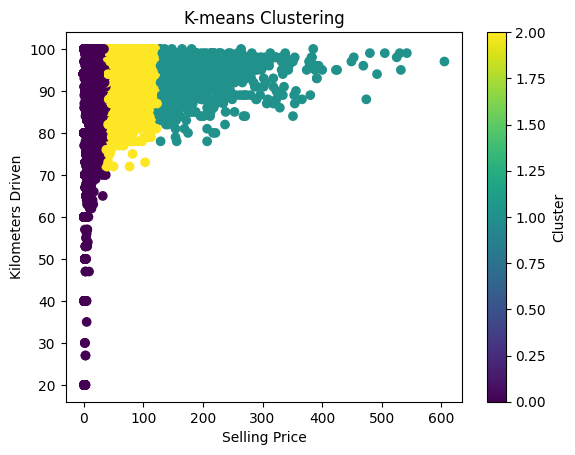

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Specify the number of clusters
num_clusters = 3

# Initialize KMeans object
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans clustering model to the data
kmeans.fit(train_new_df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to DataFrame
train_new_df['cluster'] = cluster_labels

# Visualize the clusters (example with two dimensions)
plt.scatter(train_new_df['number_of_reviews'], train_new_df['review_scores_rating'], c=train_new_df['cluster'], cmap='viridis')
plt.xlabel('number_of_reviews Price')
plt.ylabel('review_scores_rating')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

Code Overview: The Python code employs the KMeans clustering algorithm to segment data into three clusters. It uses the train_new_df DataFrame, which contains features ‘number_of_reviews’ and ‘review_scores_rating’. After fitting the model, it assigns cluster labels to each data point and visualizes the clusters in a scatter plot.
Graph Interpretation: The scatter plot titled “K-means Clustering” displays data points along two axes: ‘number_of_reviews’ and ‘review_scores_rating’. The data points are color-coded based on the cluster they belong to, as determined by the KMeans algorithm.

Findings:

Cluster Distribution: The clusters likely represent groups of data with similar review patterns.

Cluster 1 (Purple): This cluster might consist of listings with fewer reviews but varying review scores, possibly new or less popular listings.

Cluster 2 (Yellow): Listings in this cluster could have a moderate number of reviews and review scores, indicating average popularity and satisfaction.

Cluster 3 (Green): This cluster may represent listings with many reviews and high review scores, suggesting popular and highly rated listings.

Insights:

Review Patterns: The clustering can reveal patterns in customer feedback, such as the relationship between the number of reviews a listing receives and its average rating.

Business Strategy: For businesses, such insights are valuable for identifying well-received products or services and areas needing improvement.

Market Trends: The analysis can also highlight market trends, showing what types of listings are most popular or what factors contribute to higher ratings.

<ipython-input-42-3a2851dccddf>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new_df['cluster'] = cluster_labels


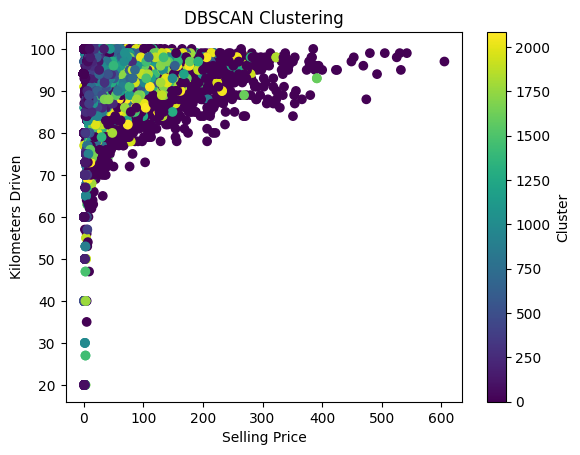

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming 'train_new_df' contains your preprocessed data
train_new_df= train_df[['number_of_reviews','review_scores_rating']]
# Initialize DBSCAN object
# Adjust 'eps' and 'min_samples' parameters as needed
dbscan = DBSCAN(eps=0.0000005, min_samples=2)

# Fit DBSCAN clustering model to the data
dbscan.fit(train_new_df)

# Get cluster labels
cluster_labels = dbscan.labels_

# Add cluster labels to DataFrame
train_new_df['cluster'] = cluster_labels

# Visualize the clusters (example with two dimensions)
plt.scatter(train_new_df['number_of_reviews'], train_new_df['review_scores_rating'], c=train_new_df['cluster'], cmap='viridis')
plt.xlabel('Selling Price')
plt.ylabel('Kilometers Driven')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')

# Adjust x-axis limits to make it smaller
#plt.xlim(0, 1000000)  # Set the range of x-axis from 0 to 100000
#plt.ylim(0,1000000)
plt.show()

In [ ]:
# Required Libraries

import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation


Importing Libraries:
Essential for loading necessary tools and functions required for data manipulation, visualization, and clustering analysis.
Libraries like pandas and NumPy enable data handling and manipulation, while matplotlib and seaborn facilitate data visualization.
SciPy provides functionality for hierarchical clustering, and scikit-learn offers implementations of agglomerative and K-means clustering algorithms, as well as metrics for evaluating clustering models.

Data Manipulation Libraries:

Pandas and NumPy are fundamental for data manipulation tasks such as loading, cleaning, and transforming data.
They provide powerful data structures and functions for efficient data handling, enabling easier preparation of data for clustering analysis.

Data Visualization Libraries:

Matplotlib and Seaborn are crucial for visualizing data distributions, patterns, and clustering results.
They allow for the creation of informative plots and charts, aiding in the exploration and interpretation of data.

Hierarchical Clustering Module:

The scipy.cluster.hierarchy module provides functions for hierarchical clustering, a technique for grouping similar data points into clusters based on their distances.
It offers flexibility in defining cluster structures and is useful for exploring hierarchical relationships within the data.

Clustering Algorithms and Evaluation Metrics:

The sklearn.cluster.AgglomerativeClustering and sklearn.cluster.KMeans classes provide implementations of agglomerative and K-means clustering algorithms, respectively.

These algorithms are widely used for partitioning data into clusters based on similarity.
The sklearn.metrics.silhouette_score and sklearn.metrics.davies_bouldin_score functions offer metrics for evaluating the quality of clustering results, helping to assess the effectiveness and appropriateness of clustering algorithms for the given data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

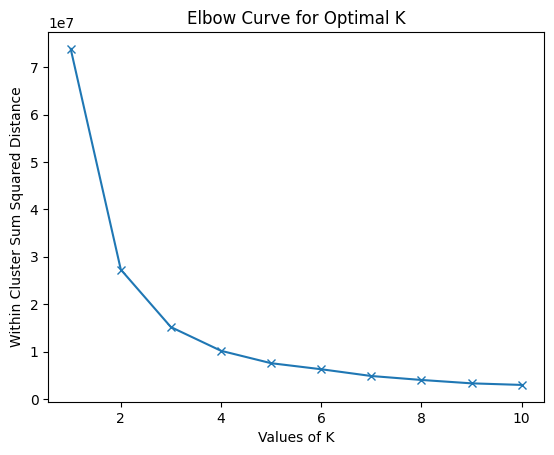

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.7771106800322154
Davies-Bouldin Index for 2 clusters: 0.5154423047935298

Silhouette Score for 3 clusters: 0.7112517126663513
Davies-Bouldin Index for 3 clusters: 0.5397454850915704

Silhouette Score for 4 clusters: 0.658127214850346
Davies-Bouldin Index for 4 clusters: 0.5461471757510343



In [ ]:
#K-Means Clustering

# 2.1.1. Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia

'''
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''
train_new_df= train_df[['number_of_reviews','review_scores_rating']]
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(train_new_df)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()

km_2cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model = km_2cluster.fit_predict(train_new_df)

km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(train_new_df)

km_4cluster = kmclus(n_clusters=4, init='random', random_state=333)
km_4cluster_model = km_4cluster.fit_predict(train_new_df)

sscore_km_2cluster = sscore(train_new_df, km_2cluster_model);
print(f"Silhouette Score for 2 clusters: {sscore_km_2cluster}")
dbscore_km_2cluster = dbscore(train_new_df, km_2cluster_model);
print(f"Davies-Bouldin Index for 2 clusters: {dbscore_km_2cluster}\n")
sscore_km_3cluster = sscore(train_new_df, km_3cluster_model)
print(f"Silhouette Score for 3 clusters: {sscore_km_3cluster}")
dbscore_km_3cluster = dbscore(train_new_df, km_3cluster_model)
print(f"Davies-Bouldin Index for 3 clusters: {dbscore_km_3cluster}\n")

sscore_km_4cluster = sscore(train_new_df, km_4cluster_model)
print(f"Silhouette Score for 4 clusters: {sscore_km_4cluster}")
dbscore_km_4cluster = dbscore(train_new_df, km_4cluster_model)
print(f"Davies-Bouldin Index for 4 clusters: {dbscore_km_4cluster}\n")


**Code Analysis:**
- **Objective:** To find the most suitable number of clusters (K) for the dataset using the Elbow Curve method and validate the clustering quality using Silhouette Score and Davies-Bouldin Index.
- **Data Preparation:** The `train_new_df` DataFrame is created with 'number_of_reviews' and 'review_scores_rating' as features for clustering.
- **WCSSD Calculation:** The code iterates through 1 to 10 clusters, fitting the KMeans model each time and storing the Within-Cluster-Sum-Squared-Distances (WCSSD).
- **Elbow Curve Plotting:** An Elbow Curve is plotted to visualize the WCSSD against the number of clusters, helping identify the optimal K value.
- **Cluster Quality Evaluation:** Silhouette Scores and Davies-Bouldin Indexes are calculated for 2, 3, and 4 clusters to assess the clustering performance.

**Graph Interpretation:**
- **Elbow Curve:** The graph shows a clear elbow point around K=2 or K=3, suggesting that either of these values could be the optimal number of clusters for the dataset.
- **WCSSD Trend:** There is a significant decrease in WCSSD as the number of clusters increases from 1 to 2 or 3, after which the rate of decrease diminishes, indicating limited improvement from additional clusters.

**Clustering Quality Metrics:**
- **Silhouette Score:** A higher Silhouette Score indicates better-defined clusters. The code prints out these scores for 2, 3, and 4 clusters.
- **Davies-Bouldin Index:** A lower Davies-Bouldin Index suggests better clustering separation. The code also prints these indexes for comparison.


